In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [13]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
station = base.classes.station
measurement = base.classes.measurement

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).\
order_by(measurement.date.desc()).first()
print (most_recent_date)

('2017-08-23',)


<function matplotlib.pyplot.show(close=None, block=None)>

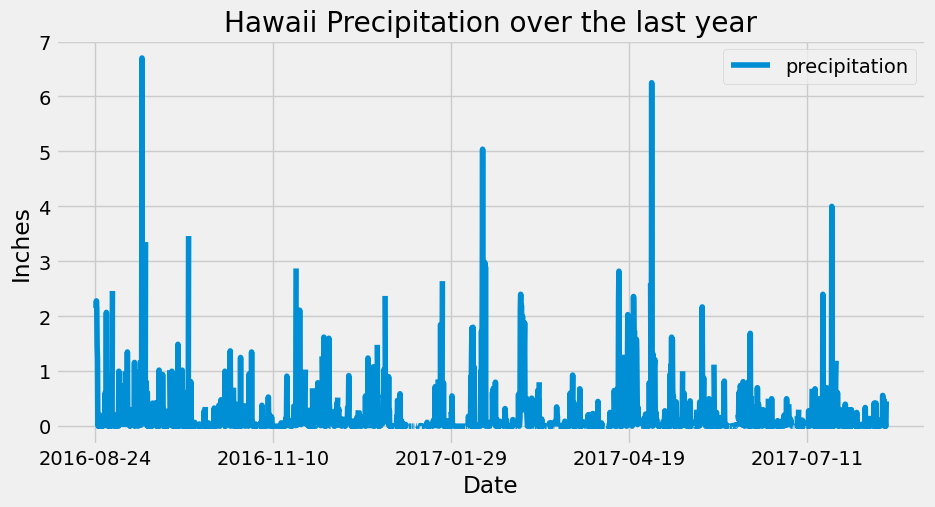

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_12_months = dt.date(2017, 8, 23)-dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
values = session.query(measurement.date, measurement.prcp).filter(measurement.date >last_12_months).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(values, columns=['date', 'precipitation'])
precip_df.set_index('date', inplace = True)

# Sort the dataframe by date
precip_df = precip_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(figsize=(10,5))
plt.title("Hawaii Precipitation over the last year")
plt.ylabel("Inches")
plt.xlabel("Date")
plt.show

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

9

In [30]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station,func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs))\
.filter(measurement.station=='USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

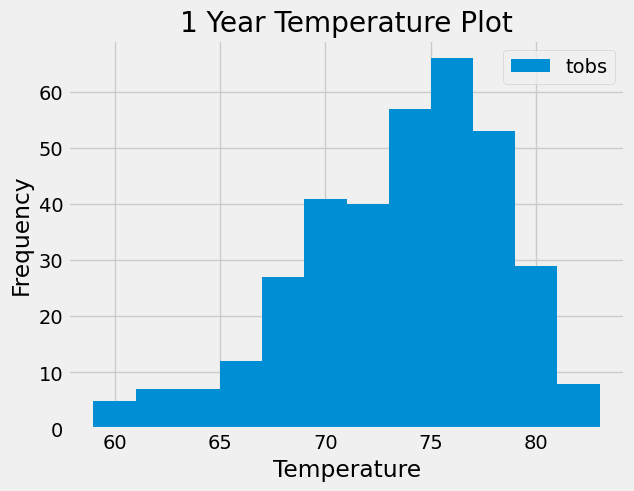

In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
values = session.query(measurement.tobs).filter(measurement.station=='USC00519281')\
    .filter(measurement.date>='2016-08-23').all()

station_df = pd.DataFrame(values, columns=['tobs'])
station_df.plot.hist(bins=12)
plt.title("1 Year Temperature Plot")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close Session

In [36]:
# Close Session
session.close()